# Introduction to Convolutional neural networks and computer vision with tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front

> 🔑 the dataset is from food 101, however, we just use two category, pizza and steak. We start small because we can quickly figure out what works (or better yet what doen't work) before scaling up

## get the data in

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the download file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-06-03 02:56:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.253.62.128, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   140MB/s    in 0.7s    

2022-06-03 02:56:12 (140 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for computer vision project..  this usually means  visualizing many samples of your data

In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
!ls pizza_steak/train/steak | wc -l

750


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} files in "{dirpath}"')

There are 2 directories and 0 files in "pizza_steak"
There are 2 directories and 0 files in "pizza_steak/test"
There are 0 directories and 250 files in "pizza_steak/test/pizza"
There are 0 directories and 250 files in "pizza_steak/test/steak"
There are 2 directories and 0 files in "pizza_steak/train"
There are 0 directories and 750 files in "pizza_steak/train/pizza"
There are 0 directories and 750 files in "pizza_steak/train/steak"


In [ ]:
# another way to find how many files in a dir
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first we get the class names programmatically.

In [ ]:
# get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train/')
class_names = np.array([item.name for item in data_dir.glob('*')])
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f'Image shape: {img.shape}')

  return img

['2614189.jpg']
Image shape: (512, 512, 3)


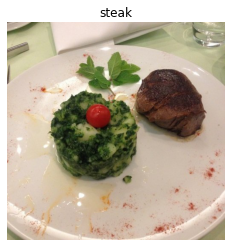

In [ ]:
# view a random image from the training dataset
img = view_random_image('pizza_steak/train/', 'steak')

['2188452.jpg']
Image shape: (512, 512, 3)


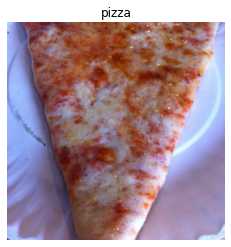

In [ ]:
# check some pizza
img = view_random_image('pizza_steak/train/', 'pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[189, 219, 253],
        [191, 221, 255],
        [191, 221, 255],
        ...,
        [150, 147, 202],
        [153, 150, 207],
        [152, 148, 207]],

       [[187, 217, 253],
        [188, 218, 254],
        [186, 216, 252],
        ...,
        [152, 149, 206],
        [155, 151, 210],
        [152, 151, 209]],

       [[184, 214, 252],
        [185, 215, 253],
        [182, 212, 250],
        ...,
        [156, 155, 212],
        [159, 158, 216],
        [158, 158, 218]],

       ...,

       [[ 70,  56,  56],
        [ 71,  59,  63],
        [102,  92, 103],
        ...,
        [168, 152, 181],
        [187, 171, 200],
        [198, 179, 211]],

       [[ 83,  66,  50],
        [ 94,  78,  65],
        [ 96,  82,  79],
        ...,
        [205, 186, 218],
        [202, 182, 217],
        [198, 178, 213]],

       [[101,  84,  58],
        [ 84,  68,  45],
        [ 78,  64,  51],
        ...,
        [219, 199, 23

In [ ]:
img / 255

array([[[0.00290657, 0.00336794, 0.00389081],
        [0.00293733, 0.00339869, 0.00392157],
        [0.00293733, 0.00339869, 0.00392157],
        ...,
        [0.00230681, 0.00226067, 0.0031065 ],
        [0.00235294, 0.00230681, 0.00318339],
        [0.00233756, 0.00227605, 0.00318339]],

       [[0.00287582, 0.00333718, 0.00389081],
        [0.0028912 , 0.00335256, 0.00390619],
        [0.00286044, 0.0033218 , 0.00387543],
        ...,
        [0.00233756, 0.00229143, 0.00316801],
        [0.0023837 , 0.00232218, 0.00322953],
        [0.00233756, 0.00232218, 0.00321415]],

       [[0.00282968, 0.00329104, 0.00387543],
        [0.00284506, 0.00330642, 0.00389081],
        [0.00279892, 0.00326028, 0.00384468],
        ...,
        [0.00239908, 0.0023837 , 0.00326028],
        [0.00244521, 0.00242983, 0.0033218 ],
        [0.00242983, 0.00242983, 0.00335256]],

       ...,

       [[0.00107651, 0.00086121, 0.00086121],
        [0.00109189, 0.00090734, 0.00096886],
        [0.00156863, 0

## an end-to-end example

let's build a convolutional neural network to find out patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns
* Compile our CNN
* Fit

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# preprocess data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# set path to our directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# the method already label the data for us
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# build a CNN model (same as the tiny VFF on the CNN example)
model_1 = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(filters=10,
                                             kernel_size=3,
                                             activation='relu',
                                             input_shape=(224,224,3)
                                             ),
                      tf.keras.layers.Conv2D(10,3, activation='relu'),
                      tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
                      tf.keras.layers.Conv2D(10, 3, activation='relu'),
                      tf.keras.layers.Conv2D(10,3, activation='relu'),
                      tf.keras.layers.MaxPool2D(2),
                      tf.keras.layers.Flatten(),
                      tf.keras.layers.Dense(1, activation='sigmoid')
                                      
])

model_1.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

> 🔑 if epoch takes longer than 10 seconds, make sure you are using GPU by going to Runtime -> change Runtime type > hardware accelerator -> GPU (you will have to resetup the environment 

In [ ]:
# first attempt to train use cpu
# Epoch 1/5
# 47/47 [==============================] - 97s 2s/step - loss: 0.5701 - accuracy: 0.6913 - val_loss: 0.4989 - val_accuracy: 0.7480
# Epoch 2/5
# 47/47 [==============================] - 98s 2s/step - loss: 0.4375 - accuracy: 0.7980 - val_loss: 0.3504 - val_accuracy: 0.8480
# Epoch 3/5
# 47/47 [==============================] - 97s 2s/step - loss: 0.4050 - accuracy: 0.8200 - val_loss: 0.3299 - val_accuracy: 0.8780
# Epoch 4/5
# 47/47 [==============================] - 96s 2s/step - loss: 0.3546 - accuracy: 0.8440 - val_loss: 0.3281 - val_accuracy: 0.8600
# Epoch 5/5
# 47/47 [==============================] - 97s 2s/step - loss: 0.3276 - accuracy: 0.8640 - val_loss: 0.2945 - val_accuracy: 0.8720

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## use CNN model for previous problem

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_2 = tf.keras.Sequential([
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(4, activation='relu'),
                tf.keras.layers.Dense(4, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics='accuracy')

history_2 = model_2.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 [==============================] - 10s 191ms/step - loss: 1.7098 - accuracy: 0.5093 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 182ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, None)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


> Previous model does not work with the new image data...

let's try to improve it

In [ ]:
tf.random.set_seed(42)

# Create a model to replicate the tensorflow playground model
model_3 = tf.keras.Sequential([
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics='accuracy')

history_3 = model_3.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 2.6679 - accuracy: 0.6113 - val_loss: 0.5741 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7807 - accuracy: 0.7107 - val_loss: 0.7143 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6385 - accuracy: 0.7200 - val_loss: 0.7603 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6031 - accuracy: 0.7293 - val_loss: 0.4725 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.7168 - accuracy: 0.7207 - val_loss: 0.6695 - val_accuracy: 0.7840


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, None)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> even our model's parameter are 500 times larger than CNN, the performance is not so good as it

## binary classification: let's break it down

1. become one with the data (visualize)
2. preprocess the data
3. created a model (start with a baseline)
4. fit
5. evaluate
6. adjust different parameters and improve the model
7. repeat until satisfied

### 1. become one with our data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the download file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-06-03 01:11:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 74.125.126.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  78.2MB/s    in 1.3s    

2022-06-03 01:11:37 (78.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

  print(f'Image shape: {img.shape}')

  return img

['786409.jpg']
Image shape: (512, 512, 3)
['774142.jpg']
Image shape: (384, 512, 3)


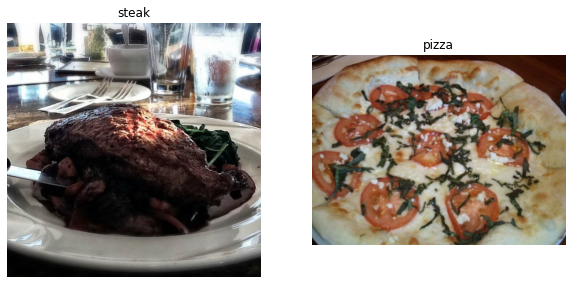

In [ ]:
# visualize data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. preprocessing our data

In [ ]:
# Define directory for our dataset
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

our next step is to turn our data into **batches**

a batch is a small subset of data, rather than look at all 1000 images at one time , a model might only look at 32 at a time. For below reasons:
1. 1000 images may not able to fit into memory of your processor (GPU)
2. trying to learn the patterns in 1000 images in one hit could result in the model not being able to learn very well
3. normally the default batch size - 32 works quite well


In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next()
images.shape, labels.shape

((32, 224, 224, 3), (32,))

In [ ]:
# how many batches are there?
len(train_data)

47

In [ ]:
# get the first image
images[0]

array([[[0.6666667 , 0.27058825, 0.5294118 ],
        [0.63529414, 0.30588236, 0.5372549 ],
        [0.5529412 , 0.34509805, 0.5254902 ],
        ...,
        [0.5176471 , 0.74509805, 0.83921576],
        [0.5294118 , 0.7490196 , 0.8470589 ],
        [0.5058824 , 0.7254902 , 0.8235295 ]],

       [[0.6156863 , 0.4901961 , 0.6431373 ],
        [0.6627451 , 0.58431375, 0.72156864],
        [0.7058824 , 0.7137255 , 0.8117648 ],
        ...,
        [0.5647059 , 0.8078432 , 0.9058824 ],
        [0.5529412 , 0.78823537, 0.89019614],
        [0.5647059 , 0.8000001 , 0.90196085]],

       [[0.7176471 , 0.9333334 , 0.9450981 ],
        [0.7294118 , 0.96470594, 0.9686275 ],
        [0.7176471 , 0.97647065, 0.9725491 ],
        ...,
        [0.53333336, 0.7960785 , 0.8980393 ],
        [0.5372549 , 0.8000001 , 0.9058824 ],
        [0.53333336, 0.78823537, 0.8980393 ]],

       ...,

       [[0.46274513, 0.7058824 , 0.86666673],
        [0.4666667 , 0.70980394, 0.8705883 ],
        [0.46274513, 0

In [ ]:
# view the first batch of labels
labels

array([0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.],
      dtype=float32)

### 3. create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then you try to beat the baseline

> 🔑 in deep learning, there is almost infinite amount of architectures you could create. so one of the best ways to get started is to start with something simple and see if it works on your data, and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [ ]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# let's create the model (as our baseline for a 3 layer convolutional neural network)
import tensorflow as tf
tf.random.set_seed(42)

model_4 = Sequential([
      Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
             kernel_size=3, # the size of the sliding window
             strides=1, # the size of the step the sliding window takes across an input
             padding='valid', # if "same", output shape is same as input; if 'valid', output shape gets compressed
             activation='relu',
             input_shape=(224,224,3)),
      Conv2D(10,3,activation='relu'),
      Conv2D(10,3,activation='relu'),
      Flatten(),
      Dense(1, activation='sigmoid')
])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# as we set the padding to 'valid', the edge is lost, e.g. from 224 to 222 in the first layer
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
tf.random.set_seed(42)
history_4 = model_4.fit(train_data, 
                        epochs=5, 
                        validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 22s 215ms/step - loss: 0.7560 - accuracy: 0.6740 - val_loss: 0.4549 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4241 - accuracy: 0.8140 - val_loss: 0.3407 - val_accuracy: 0.8640
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3633 - accuracy: 0.8547 - val_loss: 0.3521 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2926 - accuracy: 0.8880 - val_loss: 0.3673 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.1730 - accuracy: 0.9493 - val_loss: 0.3620 - val_accuracy: 0.8400


### 5. evaluate our model

it looks like our model is learning something, let's evaluate it

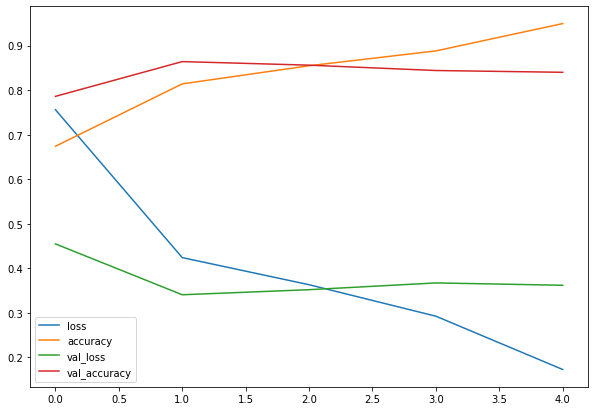

In [ ]:
# plot loss curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
# plot the validation and training curves separately
def plot_loss_curves(history):
  """
  returns separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

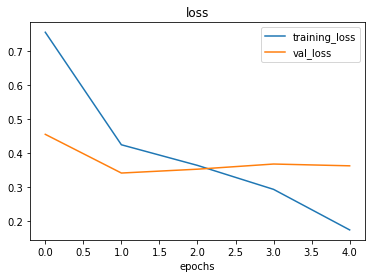

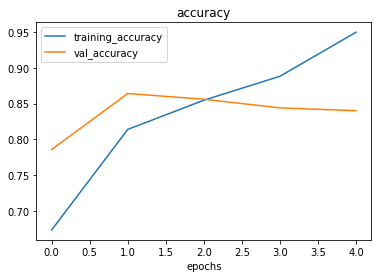

In [ ]:
# check out the loss and accuracy of model 4
plot_loss_curves(history_4)

> ideally, the train_loss curve and val_loss curve shall be similar
if the validation loss curve stops descrease while training loss still decrease, it means the model overfit the training data too well, it need be more generalized

### 6. adjust the model parameters

Fitting a machine learning model comes in 3 steps
0. Create a baseline
1. beat the baseline by overfitting a larger model
2. reduce overfitting

Ways to induce overfitting:
* increase the number of conv layers
* increase the number of conv filters
* add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* add data augmentation
* add regularization layers (such as maxPool2D)
* add more data

In [ ]:
# create the model (this will be our new baseline)
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10,3,activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# fit the model
history_5 = model_5.fit(train_data, 
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.5685 - accuracy: 0.7133 - val_loss: 0.4334 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4576 - accuracy: 0.7987 - val_loss: 0.3582 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.4043 - accuracy: 0.8160 - val_loss: 0.3365 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.3887 - accuracy: 0.8287 - val_loss: 0.3107 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3703 - accuracy: 0.8380 - val_loss: 0.3044 - val_accuracy: 0.8820


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

> though over new model has 50 times less parameters, it outperform the previous model!

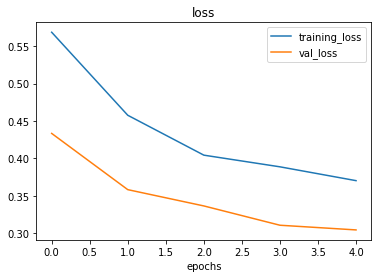

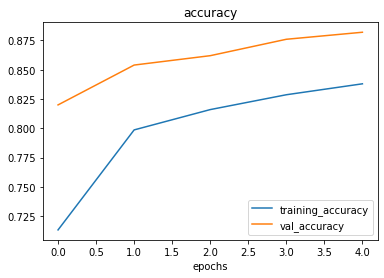

In [ ]:
# plot the loss curves
plot_loss_curves(history_5)

> 🔑 reducing overfitting is also known as **regularization**

### data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255, 
                                             rotation_range=0.2, # how much do you want to rotate a image?
                                             shear_range=0.2,    # how much do you want to shear an image
                                             zoom_range=0.2,     # zoom in randomly 
                                             width_shift_range=0.2, # move your image along the x-axis
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

> 😬 what is data augmentation

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) paterns.

Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# import data and augment it from training directory
print('Augmented training data')
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             class_mode='binary',
                                                             batch_size=32,
                                                             # shuffle=False # for demostration only
                                                             ) 

# create non-augmented train data batches
print('non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32,
                                              #  shuffle=Fals
                                               )

# create non-augmented test data batches
print('non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode='binary')



Augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


> 😬 Data augmentation is usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters ourimages are left as they are in the directories, but are modified as they're loaded into the model

In [ ]:
# Get sample augmented data batches
images, labels = train_data.next()
aug_images, aug_labels = train_data_aug.next() # labels are not augmented, only images

showing image of number: 31


(-0.5, 223.5, 223.5, -0.5)

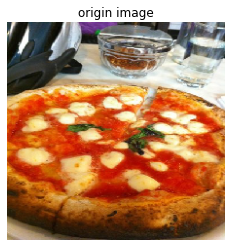

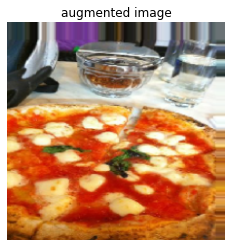

In [ ]:
# show original and augmented image
import random
import matplotlib.pyplot as plt
random_number = random.randint(0, 32) # our batch size are 32
print(f'showing image of number: {random_number}')
plt.imshow(images[random_number])
plt.title('origin image')
plt.axis(False)

plt.figure()
plt.imshow(aug_images[random_number])
plt.title('augmented image')
plt.axis(False)

In [ ]:
# create new model for the augmented training data
tf.random.set_seed(42)
model_6 = Sequential([
                      Conv2D(10,3,input_shape=(224,224,3), activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_aug,
                        epochs=5,
                        validation_data=test_data)



Epoch 1/5
47/47 [==============================] - 60s 1s/step - loss: 0.9596 - accuracy: 0.4747 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 60s 1s/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6741 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 59s 1s/step - loss: 0.6906 - accuracy: 0.5340 - val_loss: 0.6848 - val_accuracy: 0.7000
Epoch 4/5
47/47 [==============================] - 64s 1s/step - loss: 0.6879 - accuracy: 0.5753 - val_loss: 0.6513 - val_accuracy: 0.7220
Epoch 5/5
47/47 [==============================] - 63s 1s/step - loss: 0.6605 - accuracy: 0.6367 - val_loss: 0.6162 - val_accuracy: 0.7500


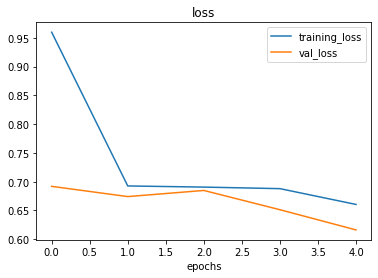

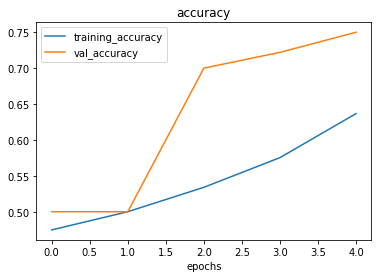

In [ ]:
plot_loss_curves(history_6)

> each epoch took 2 times longer, as it need computation power to augment the data on the fly

In [ ]:
# create new model for the augmented and shuffled data
tf.random.set_seed(42)
model_7 = Sequential([
                      Conv2D(10,3,input_shape=(224,224,3), activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10,3,activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_aug,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 60s 1s/step - loss: 0.6233 - accuracy: 0.6373 - val_loss: 0.4483 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 60s 1s/step - loss: 0.5338 - accuracy: 0.7327 - val_loss: 0.3708 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 59s 1s/step - loss: 0.5060 - accuracy: 0.7613 - val_loss: 0.4678 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.4658 - accuracy: 0.7993 - val_loss: 0.3068 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 59s 1s/step - loss: 0.4898 - accuracy: 0.7660 - val_loss: 0.3591 - val_accuracy: 0.8580


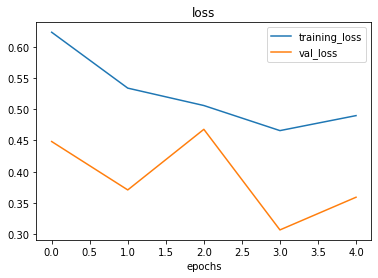

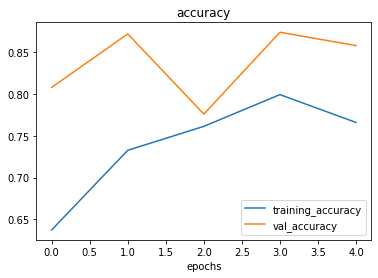

In [ ]:
plot_loss_curves(history_7)

> 😀 if we load the data sequentially, the pizza image will be loaded first -> our model will learn pizza first, but it have to adjust when it see steak data, causing the learning speed much slower than shuffle data

### 7. repeat until satisfied

since we have already beaten our baseline, there are a few things we could try to continue to improve our model:
* increase the number of our model layers (add more conv2D/ MaxPool2D)
* increase the number of filters in each conv2D layer (for 10 to 32 maybe or even 64)
* train for longer (more epochs)
* find ideal learning rate (the default one seems perform well)
* give more data
* Use 'transfer learning' to leverage what another image model has learnt and ajust it for our own use case

## make a prediction with our trained model on our own custom data

In [ ]:
# view our sample image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
steak.shape

--2022-06-03 03:40:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-06-03 03:40:47 (163 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(4032, 3024, 3)

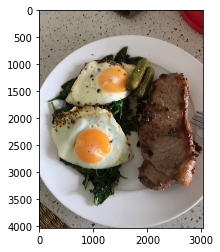

In [ ]:
plt.imshow(steak)

> if you want to predict customer data with your mode, you need to preprocess the data same as the training data your model is trained on

In [ ]:
# create a helper function to import and resize image
def load_and_prep_image(filename, img_shape=224):
  """
  reads an image from filename, and turns it into a tensor and reshapes it 
  to (img_shape, img_shape, colour_channel)
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img / 255

  return img


In [ ]:
# load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak.shape

TensorShape([224, 224, 3])

In [ ]:
model_7.predict(tf.expand_dims(steak,0))

array([[0.71774775]], dtype=float32)